construct mesh from volume fraction using marching cubes method

In [1]:
import numpy as np
side = 21
dims = np.array((side, side, side))
domain_full = np.zeros(dims, dtype=int)
center = dims//2
radius = int(side/2 * 0.75)

for x in range(side):
    for y in range(side):
        for z in range(side):
            if np.linalg.norm(center-[x,y,z]) <= radius:
                domain_full[x,y,z] = 1

c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\skimage\filters\rank\generic.py:282: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  image, footprint, out, mask, n_bins = _handle_input_3D(


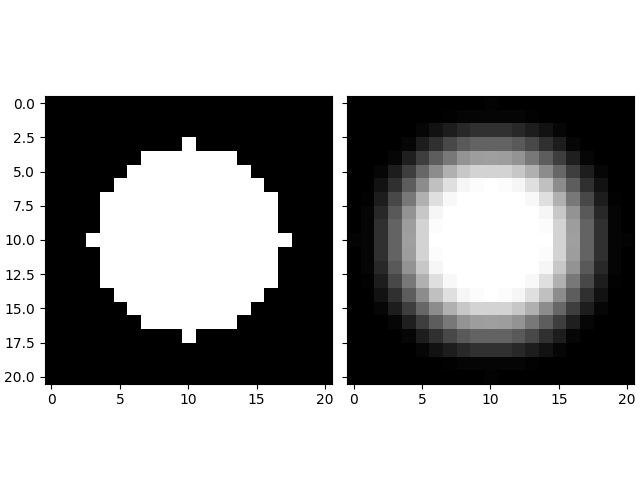

In [46]:
from skimage.morphology import ball
from skimage.filters.rank import mean
from matplotlib import pyplot as plt
%matplotlib ipympl 
kern_size = 3
dom_mean = mean(domain_full.astype(float), ball(kern_size))
center_axis = side//2
fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True)
plt.gray()  # show the filtered result in grayscale
axs[0].imshow(domain_full[center_axis,...])
axs[1].imshow(dom_mean[center_axis,...])
fig.canvas.layout.width = '500px'
plt.show()

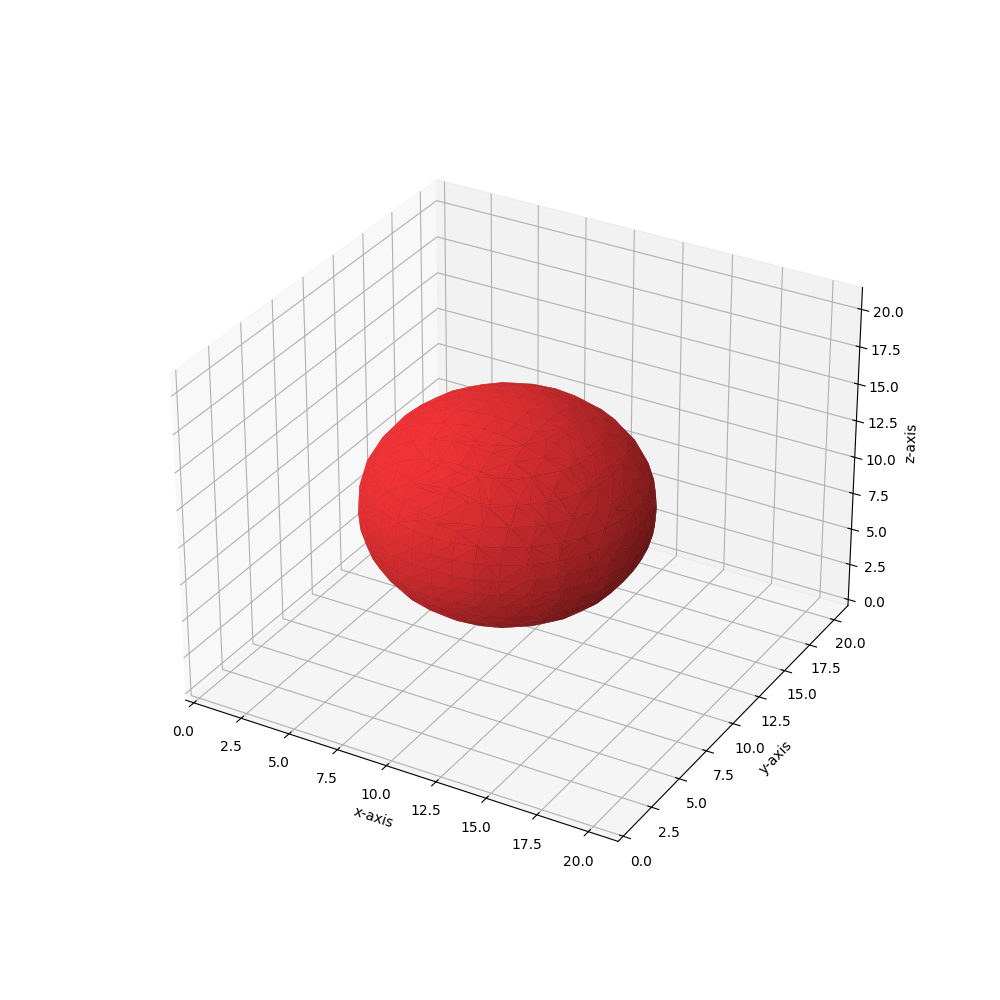

In [8]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LightSource
from matplotlib import pyplot as plt
%matplotlib ipympl
domain = dom_mean
def draw_dom(domain):
    level = np.max(domain)/2
    verts, faces, normals, values = measure.marching_cubes(domain, level = level, step_size = 1)

    ls = LightSource(azdeg=225.0, altdeg=45.0)
    if 1 == 1:
        mesh = Poly3DCollection(verts[faces], edgecolor = (0,0,0), linewidths = 0, alpha = 1)
        normalsarray = np.array([np.array((np.sum(normals[face[:], 0]/3), np.sum(normals[face[:], 1]/3), np.sum(normals[face[:], 2]/3))/np.sqrt(np.sum(normals[face[:], 0]/3)**2 + np.sum(normals[face[:], 1]/3)**2 + np.sum(normals[face[:], 2]/3)**2)) for face in faces])

        # Next this is more asthetic, but it prevents the shadows of the image being too dark. (linear interpolation to correct)
        min = np.min(ls.shade_normals(normalsarray, fraction=1.0)) # min shade value
        max = np.max(ls.shade_normals(normalsarray, fraction=1.0)) # max shade value
        diff = max-min
        newMin = 0.3
        newMax = 0.95
        newdiff = newMax-newMin

        # Using a constant color, put in desired RGB values here.
        colourRGB = np.array((255.0/255.0, 54.0/255.0, 57/255.0, 1.0))

        # The correct shading for shadows are now applied. Use the face normals and light orientation to generate a shading value and apply to the RGB colors for each face.
        rgbNew = np.array([colourRGB*(newMin + newdiff*((shade-min)/diff)) for shade in ls.shade_normals(normalsarray, fraction=1.0)])

        # Apply color to face
        mesh.set_facecolor(rgbNew)

    else:

        ls.shade_normals(normals, fraction=1.0)
        shading_enabled = False # lighting does not work
        mesh = Poly3DCollection(verts[faces], lightsource=ls, facecolor = (1,0,0), edgecolor = (0,0,0), linewidths = .1, shade= shading_enabled)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.add_collection3d(mesh)

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")

    ax.set_xlim(0, domain.shape[0])  
    ax.set_ylim(0, domain.shape[1])  
    ax.set_zlim(0, domain.shape[2]) 

    #plt.tight_layout()
    plt.show()

draw_dom(dom_mean)

In [6]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import ball
from skimage.filters.rank import mean

sobel_x = ndimage.sobel(domain_full, 0)  # horizontal gradient
sobel_y = ndimage.sobel(domain_full, 1)  # vertical gradient
sobel_z = ndimage.sobel(domain_full, 2)  # vertical gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2 + sobel_z**2)
magnitude /= np.max(magnitude)
print(np.max(magnitude))
kern_size = 3
magnitude = mean(magnitude, ball(kern_size)).astype(float)

magnitude /= np.max(magnitude)
print(np.max(magnitude))
thld = magnitude > 0.5
magnitude = np.uint8(thld*255 ) # threshold
#magnitude = np.uint8(255 - magnitude)


1.0
1.0


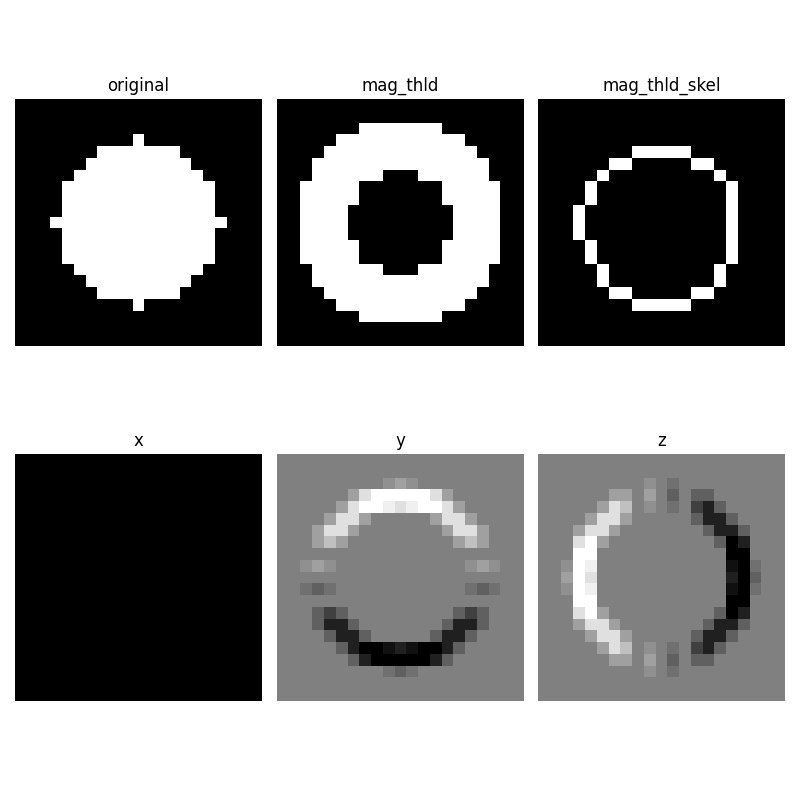

In [7]:
from skimage.morphology import skeletonize_3d

magnitude2 = skeletonize_3d(magnitude)
fig, axs = plt.subplots(2, 3, figsize=(8, 8))
plt.gray()  # show the filtered result in grayscale
center_axis = side//2
ex = domain_full[center_axis,...]
axs[0, 0].imshow(ex)
axs[0, 1].imshow(magnitude[center_axis,...])
axs[0, 2].imshow(magnitude2[center_axis,...])
axs[1, 0].imshow(sobel_x[center_axis,...])
axs[1, 1].imshow(sobel_y[center_axis,...])
axs[1, 2].imshow(sobel_z[center_axis,...])


titles = ["original",'mag_thld', 'mag_thld_skel',"x", "y", 'z']
for i, ax in enumerate(axs.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [29]:
import cv2
z_len = 100
r2 = 30
domain_c = np.zeros((2*r2+1, 2*r2+1, z_len), np.uint8)
axis_z = lambda z: np.array([*domain_c.shape[:2],0])//2 + [0,0,z]
print(domain_c.shape,axis_z(0))
for x in range(domain_c.shape[0]):
    for y in range(domain_c.shape[1]):
        for z in range(domain_c.shape[2]):
            if np.linalg.norm(axis_z(z)-[x,y,z]) <= r2:
                domain_c[x,y,z] = 255

#draw_dom(domain_c)
tst = domain_c[...,0]
cv2.imshow('1',tst)

k = cv2.waitKey(0)
if k == 27:  # close on ESC key
    cv2.destroyAllWindows()


(61, 61, 100) [30 30  0]


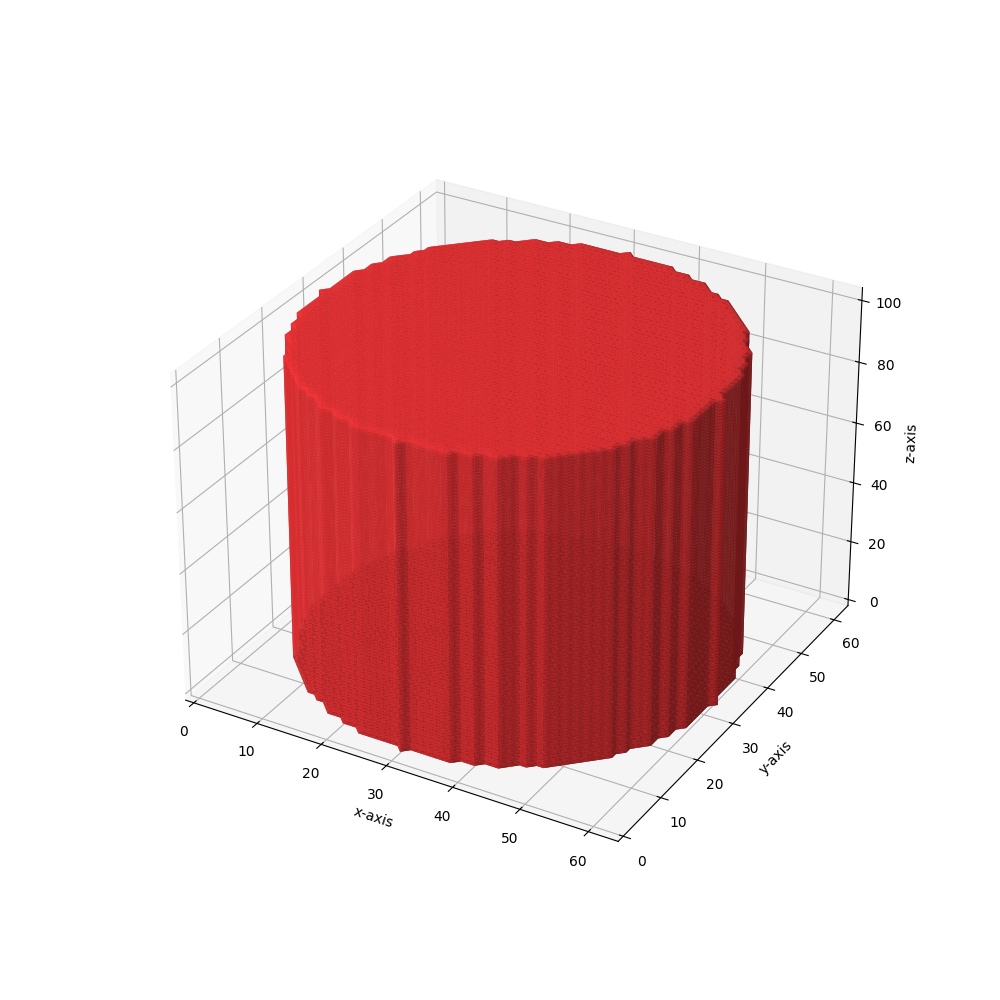

In [32]:
pw = pad_width = 1
shape_new = np.array(domain_c.shape) + 2*np.array([pad_width, pad_width, pad_width])
print()
blank = np.zeros(shape_new, np.uint8)
blank[pw:-pw,pw:-pw,pw:-pw] = domain_c
draw_dom(blank)

In [42]:
from scipy import ndimage

tst = domain_c[5,...]

tst_r = ndimage.rotate(tst, 45, reshape=True)
cv2.imshow('1',tst)
cv2.imshow('2',tst_r)
k = cv2.waitKey(0)
if k == 27:  # close on ESC key
    cv2.destroyAllWindows()

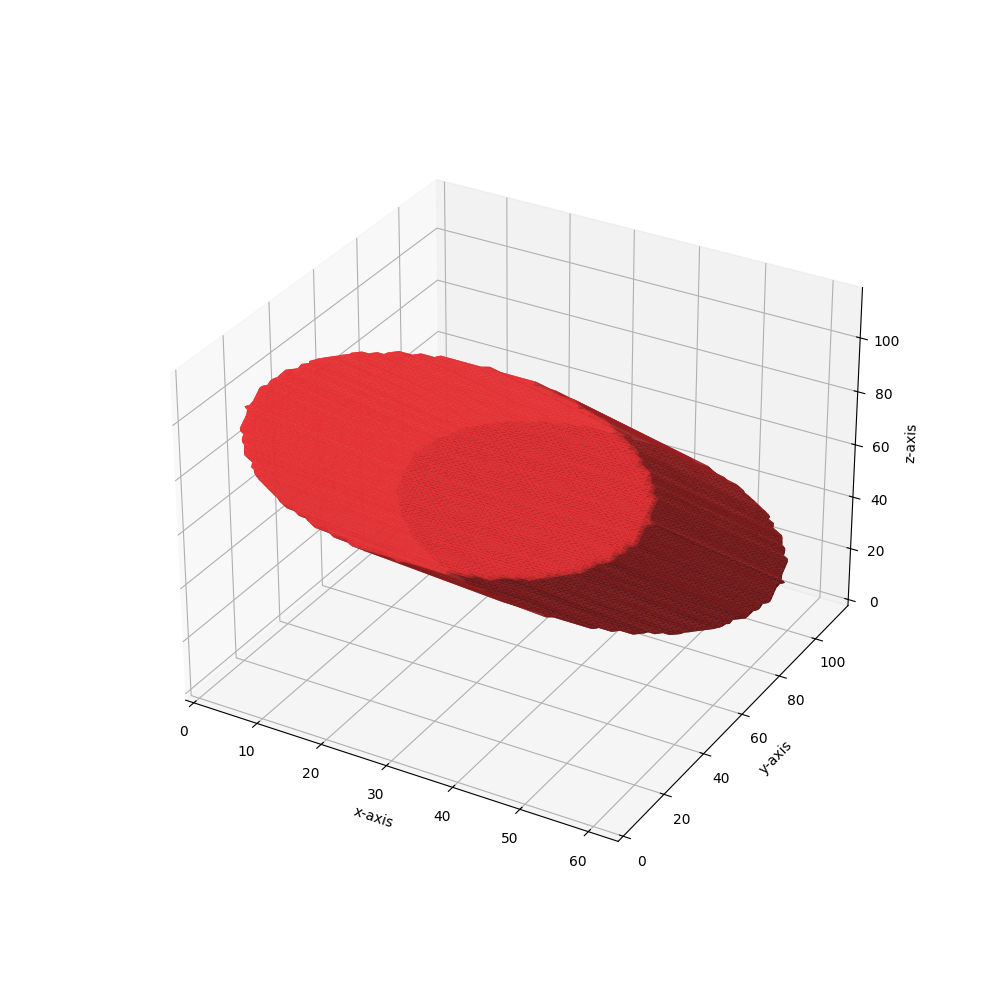

In [45]:
domain_c2 = ndimage.rotate(domain_c, 45, reshape=True, axes = (1,2))

pw = pad_width = 1
shape_new = np.array(domain_c2.shape) + 2*np.array([pad_width, pad_width, pad_width])
print()
blank = np.zeros(shape_new, np.uint8)
blank[pw:-pw,pw:-pw,pw:-pw] = domain_c2
draw_dom(blank)

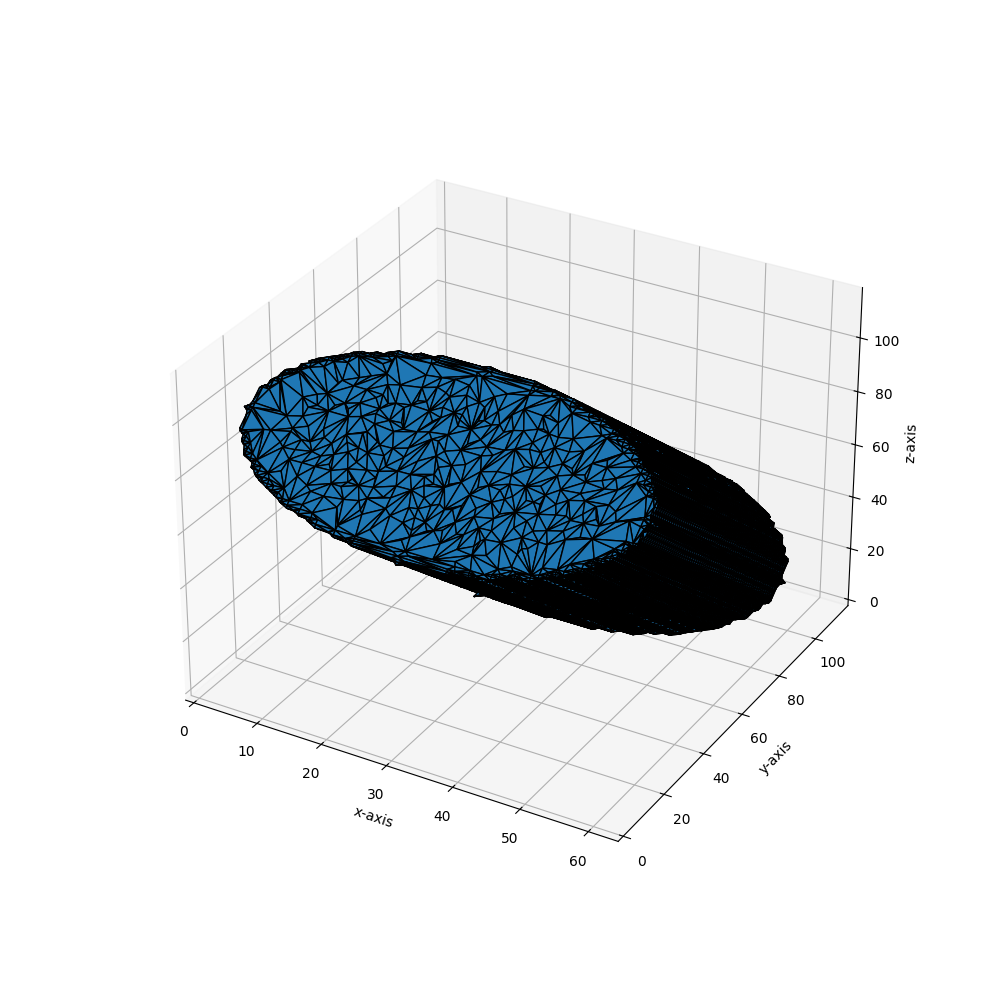

In [50]:
domain = blank
level = np.max(domain)/2
verts, faces, normals, values = measure.marching_cubes(domain, level = level, step_size = 1)
import fast_simplification
points_out, faces_out = fast_simplification.simplify(verts, faces, 0.5)
mesh = Poly3DCollection(points_out[faces_out], edgecolor = (0,0,0), linewidths = 1, alpha = 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, domain.shape[0])  
ax.set_ylim(0, domain.shape[1])  
ax.set_zlim(0, domain.shape[2]) 

#plt.tight_layout()
plt.show()



In [52]:
import pyvista as pv

a = 0.9


def spider_cage(x, y, z):
    x2 = x * x
    y2 = y * y
    x2_y2 = x2 + y2
    return (np.sqrt((x2 - y2) ** 2 / x2_y2 + 3 * (z * np.sin(a)) ** 2) - 3) ** 2 + 6 * (
        np.sqrt((x * y) ** 2 / x2_y2 + (z * np.cos(a)) ** 2) - 1.5
    ) ** 2


# create a uniform grid to sample the function with
n = 100
x_min, y_min, z_min = -5, -5, -3
grid = pv.ImageData(
    dimensions=(n, n, n),
    spacing=(abs(x_min) / n * 2, abs(y_min) / n * 2, abs(z_min) / n * 2),
    origin=(x_min, y_min, z_min),
)
x, y, z = grid.points.T

# sample and plot
values = spider_cage(x, y, z)
mesh = grid.contour([1], values, method='marching_cubes')
dist = np.linalg.norm(mesh.points, axis=1)
mesh.plot(scalars=dist, smooth_shading=True, cmap="plasma", show_scalar_bar=False)

AttributeError: module 'pyvista' has no attribute 'ImageData'